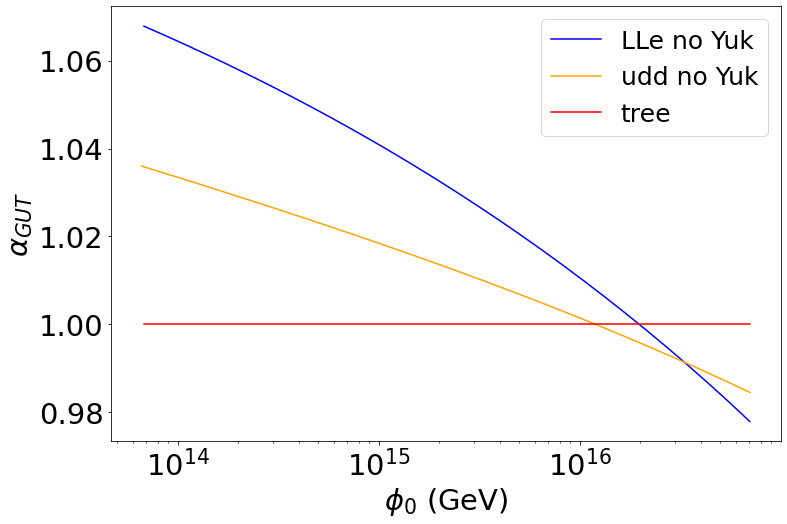

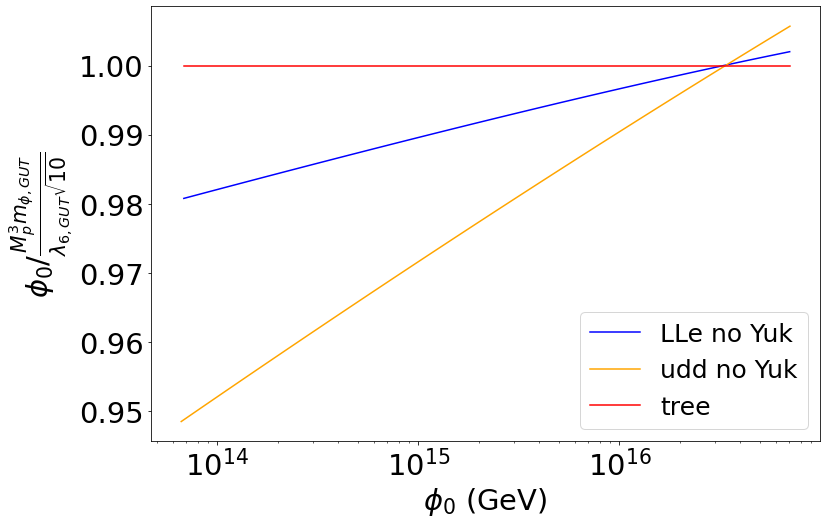

In [2]:
import pandas as pd
import numpy as np
import mpmath as mp
import matplotlib.pyplot as plt
from mpmath import *
mp.dps= 150

lnMpinGev = mp.mpf('42.334')
Mp = mp.exp(lnMpinGev)

def define_plot_resolution():
    fig = plt.gcf()  # get current figure

    DPI = fig.get_dpi()
#     fig.set_size_inches(1920.0 / float(DPI), 1080.0 / float(DPI))
    fig.set_size_inches(12, 8)
    ax = plt.gca()
    for tickLabel in ax.get_xticklabels()+ax.get_yticklabels():
        tickLabel.set_fontsize(29)
    ax.yaxis.label.set_size(29)
    ax.xaxis.label.set_size(29)
    ax.yaxis.offsetText.set_fontsize(29)
    ax.xaxis.offsetText.set_fontsize(29)
    return

def pd_to_array(file, column, dtype=float):
    if dtype == float:
        return np.array([mp.mpf(x) for x in file[column]], dtype=float)
    else:
        return np.array([mp.mpf(x) for x in file[column]])
    
m0_udd_09653_30 = pd.read_csv('log_m0_lle_09653.csv',engine='python',dtype=str)
m0_lle_09653_30 = pd.read_csv('log_m0_udd_09653.csv',engine='python',dtype=str)

def alpha(file, dtype=float):
    if dtype == float:
        return pd_to_array(file, 'A6', dtype=float)**2/(40*pd_to_array(file, 'mphi', dtype=float)**2)
    else:
        return pd_to_array(file, 'A6', dtype='mp')**mp.mpf('2')/(mp.mpf('40')*pd_to_array(file, 'mphi', dtype='mp')**mp.mpf('2'))
    

plt.figure(1)
plt.semilogx()
plt.plot(pd_to_array(m0_udd_09653_30, 'phi0B'), alpha(m0_udd_09653_30),'blue', label='LLe no Yuk')
plt.plot(pd_to_array(m0_lle_09653_30, 'phi0B'), alpha(m0_lle_09653_30),'orange', label='udd no Yuk')
plt.plot(pd_to_array(m0_udd_09653_30, 'phi0B'), len(pd_to_array(m0_udd_09653_30, 'phi0B'))*[1],'red', label='tree')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\alpha_{GUT}$')
plt.legend(fontsize=25)
define_plot_resolution()

def phi0B(file, dtype=float):
    if dtype == float:
        return (Mp**3*pd_to_array(file, 'mphi', dtype='mp')/(mp.sqrt(mp.mpf('10'))*pd_to_array(file, 'lambda6', dtype='mp')))**mp.mpf('0.25')
    else:
        return (Mp**3*pd_to_array(file, 'mphi', dtype='mp')/(mp.sqrt(mp.mpf('10'))*pd_to_array(file, 'lambda6', dtype='mp')))**mp.mpf('0.25')
    
        
plt.figure(2)
plt.semilogx()
plt.plot(pd_to_array(m0_udd_09653_30, 'phi0B'), pd_to_array(m0_udd_09653_30, 'phi0B')/phi0B(m0_udd_09653_30),'blue', label='LLe no Yuk')
plt.plot(pd_to_array(m0_lle_09653_30, 'phi0B'), pd_to_array(m0_lle_09653_30, 'phi0B')/phi0B(m0_lle_09653_30),'orange', label='udd no Yuk')
plt.plot(pd_to_array(m0_udd_09653_30, 'phi0B'), len(pd_to_array(m0_udd_09653_30, 'phi0B'))*[1],'red', label='tree')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\phi_0/\frac{M_p^3m_{\phi,GUT}}{\lambda_{6,GUT}\sqrt{10}}$')
plt.legend(fontsize=25)
define_plot_resolution()
